<a href="https://colab.research.google.com/github/Raquel223/Ciclo-Diurno-Relampagos/blob/main/Frequ%C3%AAncia_BrasilDAT_Dezembro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ciclo diurno da frequência dos relâmpagos**
---
- **OBJETIVO:** Observar qual a variação temporal dos relâmpagos ao longo do dia. 

---

**Dados utilizados**: Os dados de relâmpagos foram obtidos da rede BrasilDAT, através da campanha CHUVA-Vale do Paraíba. Neste exemplo foram utilizados dados do mês de dezembro.

---

- **METODOLOGIA:** Nessa aula realizaremos os seguintes procedimentos:

    1.   **Importação** das biblotecas
    2.   Montagem do **drive online**
    3.   **Abrir** o arquivo 
    4.   **Contagem** da quantidade de relâmpagos
    5.   **Transformar** UTC para hora local
    6.   **Plotar** a figura
    
---

**OBSERVAÇÕES IMPORTANTES**: 
1. Fazer mudanças, veja em: **### >>> MUDANÇAS AQUI <<< ###**
    - 1. Caminho do seu drive 

---
- **Realizado por:** Raquel Gonçalves Pereira e Enrique V. Mattos - 25/08/2021

# **Exemplo da figura que será gerada**



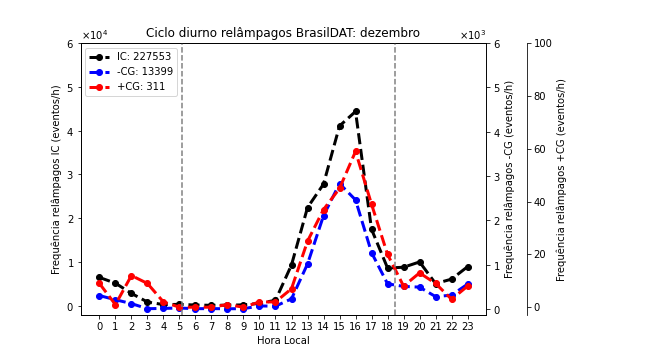

# **Importação das bibliotecas**

In [ ]:
import pandas as pd
import glob
import os
from matplotlib import pyplot as plt
import numpy as np

# **Montagem do drive online**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **### >>> MUDANÇAS AQUI <<< ###**:
- Insira o **caminho + nome** do arquivo

In [ ]:
filename = '/content/drive/MyDrive/GitHub/BrasilDAT/Novo_Dezembro.csv'

dir = os.path.dirname(filename)

# **Abrindo o arquivo csv (filtro de 100 km)**

In [ ]:
df = pd.read_csv(filename)
df
#index_col=0 para tirar o unnamed 

,Unnamed: 0,tipo,ano,mes,dia,hor,pc(A),lat,lon,distancia
0,291,IC,2011,12,1,0,2.0,-23.831063,-47.362767,80.176647
1,393,IC,2011,12,1,0,-3.6,-23.747681,-47.299678,70.926538
2,427,IC,2011,12,1,0,-3.0,-23.680954,-47.207217,59.820518
3,464,IC,2011,12,1,0,2.2,-23.660856,-47.214331,60.030432
4,730,IC,2011,12,1,0,-2.0,-23.883682,-47.379116,84.102026
...,...,...,...,...,...,...,...,...,...,...
241258,3565780,IC,2011,12,31,23,11.4,-23.180063,-47.192800,69.840121
241259,3568857,IC,2011,12,31,23,2.4,-23.360032,-45.774964,90.710722
241260,3568858,IC,2011,12,31,23,1.4,-23.373971,-45.744405,93.414592
241261,3568859,IC,2011,12,31,23,-2.3,-23.365797,-45.753093,92.742952


**Filtro somente as colunas que irão ser utilizadas**

In [ ]:
tipos_hora_pico = df[['tipo','hor','pc(A)']]
display(tipos_hora_pico)
type(tipos_hora_pico)

,tipo,hor,pc(A)
0,IC,0,2.0
1,IC,0,-3.6
2,IC,0,-3.0
3,IC,0,2.2
4,IC,0,-2.0
...,...,...,...
241258,IC,23,11.4
241259,IC,23,2.4
241260,IC,23,1.4
241261,IC,23,-2.3


pandas.core.frame.DataFrame

**Separando os relâmpagos CG e IC**

In [ ]:
CG = tipos_hora_pico[ tipos_hora_pico['tipo'] == 'CG' ]
IC = tipos_hora_pico[ tipos_hora_pico['tipo'] == 'IC' ]

**Separando os CG em positivo e negativo**

In [ ]:
CG_pos = CG[CG['pc(A)'] > 0]
CG_neg = CG[CG['pc(A)'] < 0]

# **Contagem da quantidade de relâmpagos em cada hora do dia**

**IC**

In [ ]:
quantidade_IC = IC["hor"].value_counts(ascending=True)
new_index = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
IC_ = quantidade_IC.sort_index().reindex(new_index,fill_value=0) #Criação de um novo índice e reindexe o dataframe. Preencher os valores ausentes passando um valor fill_value

**+CG**

In [ ]:
quantidade_CG_pos = CG_pos["hor"].value_counts(ascending=True)
new_index1 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
CG_pos_ = quantidade_CG_pos.sort_index().reindex(new_index1,fill_value=0)

**-CG**

In [ ]:
quantidade_CG_neg = CG_neg["hor"].value_counts(ascending=True)
new_index2 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
CG_neg_= quantidade_CG_neg.sort_index().reindex(new_index2,fill_value=0)

# **Transformar hora UTC em hora local**

**IC**

In [ ]:
IC_df = pd.DataFrame(IC_)   #passar series para um dataframe
Hora_local1 = [21,22,23,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
IC_df.insert(loc =1,column ='Hora local', value = Hora_local1)  #adicionei a coluna hora local no final do date frame
IC_final = IC_df.set_index('Hora local') #transformei o index na hora local 
IC_finalizado = IC_final.sort_index()  #coloquei em ordem crescente

**+CG**

In [ ]:
CG_pos_df = pd.DataFrame(CG_pos_)   #passar series para um dataframe
Hora_local2 = [21,22,23,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
CG_pos_df.insert(loc =1,column ='Hora local', value = Hora_local2)  #adicionei a coluna hora local no final do date frame
CG_pos_final = CG_pos_df.set_index('Hora local') #transformei o index na hora local 
CG_pos_finalizado = CG_pos_final.sort_index()  #coloquei em ordem crescente

**-CG**

In [ ]:
CG_neg_df = pd.DataFrame(CG_neg_)   #passar series para um dataframe
Hora_local = [21,22,23,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
CG_neg_df.insert(loc =1,column ='Hora local', value = Hora_local)  #adicionei a coluna hora local no final do date frame
CG_neg_final = CG_neg_df.set_index('Hora local') #transformei o index na hora local 
CG_neg_finalizado = CG_neg_final.sort_index()  #coloquei em ordem crescente

# **Plotar a figura**

**Parte 1**: Juntar os tres tipos de relâmpagos em uma tabela

In [ ]:
tabela = pd.concat([IC_finalizado, CG_pos_finalizado, CG_neg_finalizado],axis =1) 
tabela.columns = ['IC','+CG','-CG']
display(tabela)

,IC,+CG,-CG
Hora local,,,
0,6440,9,299
1,5118,1,206
2,2790,12,118
3,813,9,3
4,227,2,10
5,278,0,18
6,124,0,3
7,63,0,5
8,89,1,2


**Parte 2**: Somar a quantidade de relâmpagos de cada tipo de todos os horários

In [ ]:
#adicionar uma variavel com a soma dos relampagos
soma_ic = tabela['IC'].sum()
soma_cg_mais = tabela['+CG'].sum()
soma_cg_menos = tabela['-CG'].sum()
display(soma_ic)
display(soma_cg_menos)
display(soma_cg_mais)

227553

13399

311

**Parte 3** : Plotagem final

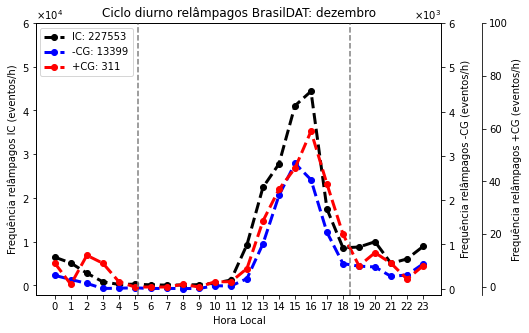

In [ ]:
IC_F = tabela['IC']
CGMAIS = tabela['+CG']
CGMENOS = tabela['-CG']

fig, ax = plt.subplots(figsize=(9,5))
fig.subplots_adjust(right=0.75)

#plotar mais de um eixo y
twin1 = ax.twinx()
twin2 = ax.twinx()
twin2.spines["right"].set_position(("axes", 1.1))

p1, = ax.plot(IC_F, color = 'black', marker = 'o', lw =3, ls = '--', label = 'IC: 227553')
p2, = twin1.plot(CGMENOS, color = 'blue', marker = 'o', lw =3, ls = '--', label = '-CG: 13399')
p3, = twin2.plot(CGMAIS, color = 'red', marker = 'o', lw =3, ls = '--', label = '+CG: 311')

ax.set_xticks(np.arange(0,24,1))
ax.set_yticks(np.arange(0,70000,10000))
twin1.set_yticks(np.arange(0,7000,1000))
twin2.set_yticks(np.arange(0,120,20))

#Passando os eixos para notação científica
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
twin1.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)

#Nome dos eixos
ax.set_xlabel("Hora Local")
ax.set_ylabel("Frequência relâmpagos IC (eventos/h)")
twin1.set_ylabel("Frequência relâmpagos -CG (eventos/h)")
twin2.set_ylabel("Frequência relâmpagos +CG (eventos/h)")

#Se quiser deixar os eixos com as cores das linhas de cada variável
#ax.yaxis.label.set_color(p1.get_color())
#twin1.yaxis.label.set_color(p2.get_color())
#twin2.yaxis.label.set_color(p3.get_color())

#Legenda
ax.legend(handles=[p1, p2, p3], loc=1, bbox_to_anchor=(.25,1.))

#plotar linhas verticais no gráfico. Nessa caso está sendo plotado os horários de nascer e por do sol
plt.axvline(x=5.17, color ='gray', ls = '--')
plt.axvline(x=18.46, color='gray', ls = '--')

#título da figura
plt.title('Ciclo diurno relâmpagos BrasilDAT: dezembro')

#salvando a figura
plt.savefig(f'{dir}/Frequencia_BrasilDAT_Dezembro.png', format='png')